# Week 5 Discussion -- Alternate Examples

This notebook has the examples presented in the second discussion section. They use `petal_width` instead of `petal_length`.

See the main discussion 5 notes for everything else.

### Example 1: Manual Classification

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotnine import *
import seaborn as sns
import sklearn as sk
import sklearn.datasets

/usr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# The iris data set is included with seaborn.
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Can we predict species based on the other four variables?

For instance, if an observation has `sepal_length` $> c$ can we say what species it is?

How should we choose $c$ to work well for all observations?

And should we use `sepal_length`, or some other variable, or a combination of variables?

---

Based on the pair plot, `sepal_length` is not going to work well. Neither is `sepal_width`.

But `petal_length` and `petal_width` might.

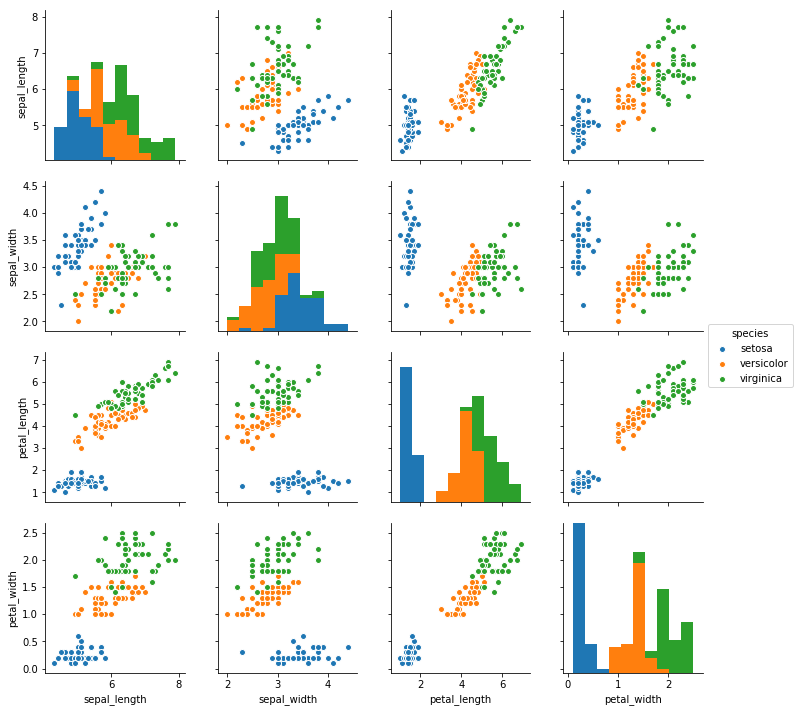

In [4]:
sns.pairplot(iris, hue = "species")

Can we manually come up with a _classifier_ (a set of rules for choosing the species based on the four variables)?

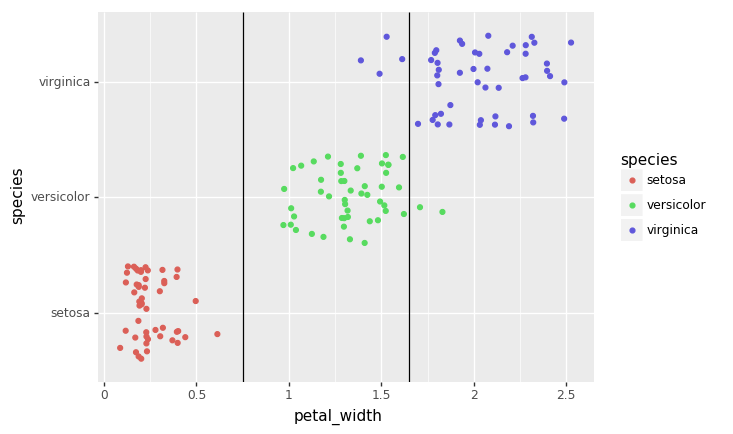

<ggplot: (8753630103651)>

In [9]:
g = ggplot(iris, aes(x = "petal_width", y = "species", color = "species")) + geom_jitter()
g += geom_vline(xintercept = .75)
g += geom_vline(xintercept = 1.65)
g

How can we check how "good" our classifier is?

In [11]:
# split at .75 and 1.65
iris['predicted'] = 'setosa'
iris.loc[iris.petal_width > 0.75, 'predicted'] = 'versicolor'
iris.loc[iris.petal_width > 1.65, 'predicted'] = 'virginica'
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [12]:
pd.crosstab(iris.species, iris.predicted)

predicted,setosa,versicolor,virginica
species,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,4,46


### Example 2: Recall and Precision

If we ignore setosa, there are only two classes (a _binary_ classification problem).

In [13]:
iris2 = iris[iris.species != 'setosa'].copy()
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
50,7.0,3.2,4.7,1.4,versicolor,versicolor
51,6.4,3.2,4.5,1.5,versicolor,versicolor
52,6.9,3.1,4.9,1.5,versicolor,versicolor
53,5.5,2.3,4.0,1.3,versicolor,versicolor
54,6.5,2.8,4.6,1.5,versicolor,versicolor


In [16]:
cm = pd.crosstab(iris2.species, iris2.predicted)
cm

predicted,versicolor,virginica
species,,
versicolor,48,2
virginica,4,46


In this case, we can think of one class as "positive" and one class as "negative".

Let's say versicolor is "positive". Then our confusion matrix has counts for four possibilities:

True Positive | False Negative
:---|:----
__False Positive__ | __True Negative__

We can use this to compute three statistics:

\begin{align*}
\frac{ \textrm{TP} }{ \textrm{TP + FN} } &= \textrm{True Positive Rate or Recall} &\textit{higher is better}
\\
\frac{ \textrm{FP} }{ \textrm{FP + TN} } &= \textrm{False Positive Rate} &\textit{lower is better}
\\
\frac{ \textrm{TP} }{ \textrm{TP + FP} } &= \textrm{Precision} &\textit{higher is better}
\end{align*}

Recall and precision emphasize predicting the "positive" class correctly. They change as we change our classifier.

In [19]:
def recall(x):
    return x.iloc[0, 0] / (x.iloc[0, 0] + x.iloc[0, 1])

def precision(x):
    return x.iloc[0, 0] / (x.iloc[0, 0] + x.iloc[1, 0])

In [20]:
"Precision is {}, Recall is {}".format(precision(cm), recall(cm))

'Precision is 0.9230769230769231, Recall is 0.96'

In [30]:
pr_values = []
for x in np.linspace(1, 2, 12):
    iris2['predicted'] = 'versicolor'
    iris2.loc[iris2.petal_width > x, 'predicted'] = 'virginica'
    cm = pd.crosstab(iris2.species, iris2.predicted)
    pr_values.append((x, precision(cm), recall(cm)))
    
pr_values = pd.DataFrame(pr_values)
pr_values.columns = ["petal_width", "precision", "recall"]
pr_values.head()

,petal_width,precision,recall
0,1.000000,1.0,0.14
1,1.090909,1.0,0.14
2,1.181818,1.0,0.20
3,1.272727,1.0,0.30
4,1.363636,1.0,0.56


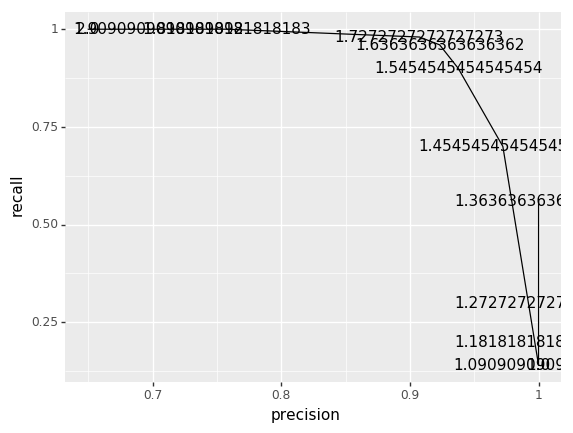

<ggplot: (-9223363283229376501)>

In [32]:
ggplot(pr_values, aes("precision", "recall")) + geom_line() + geom_text(aes(label = "petal_width"))

Do recall and precision make sense when there are more than two classes?